## start up

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import skimage as sk

from scipy import ndimage as ndi

import os
%matplotlib inline

## local files

In [2]:
import utils
import boudingBox
import nanoSegmentation

## DEMO

In [7]:
import dearpygui.dearpygui as dpg

def save_callback():
    print("Save Clicked")

dpg.create_context()
dpg.create_viewport()
dpg.set_viewport_clear_color("color=red")
dpg.setup_dearpygui()

with dpg.window(label="Example Window"):
    dpg.add_text("Hello world")
    dpg.add_button(label="Save", callback=save_callback)
    dpg.add_input_text(label="string")
    dpg.add_slider_float(label="float")

dpg.show_viewport()
dpg.start_dearpygui()
dpg.destroy_context()

## second pass

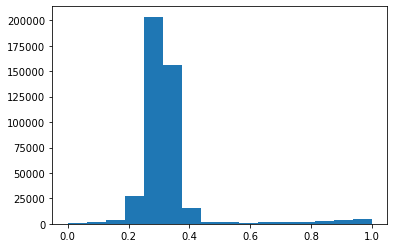

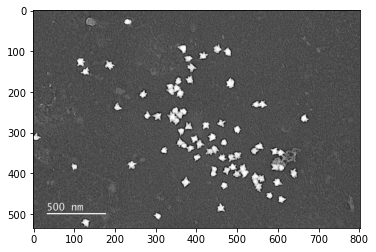

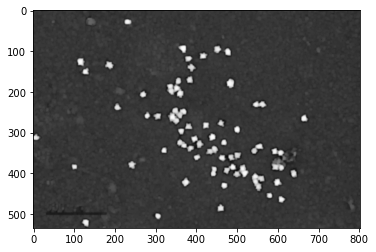

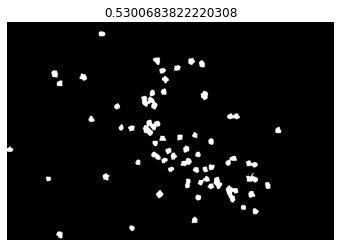

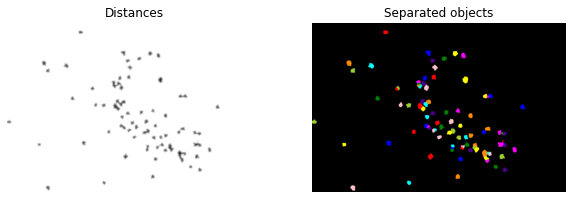

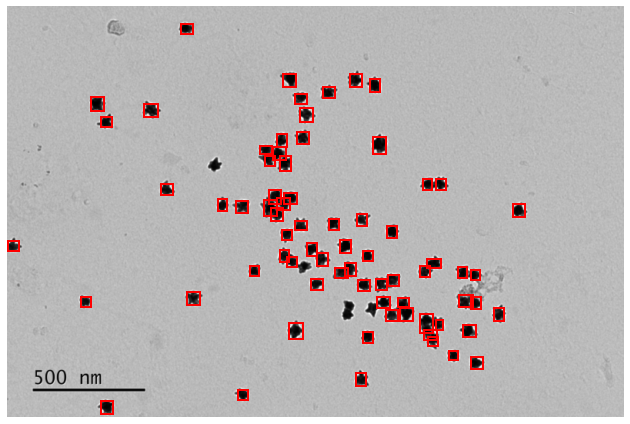

In [82]:
im2 = utils.openFile("img/nanostars Au -10kX -0004.jpg",5)
im2processed = nanoSegmentation.preProcessing(im2,5,1,True)
imBinary2 = nanoSegmentation.thresholdOtsu(im2processed,True)
labels2, markers2 = nanoSegmentation.distanceBasedWatershed(imBinary2,True)
bboxArray = boudingBox.getBoundingBox(255 - im2, labels2,100, True)
boudingBox.exctractParticle(255 - im2, bboxArray, save=True, display=False)

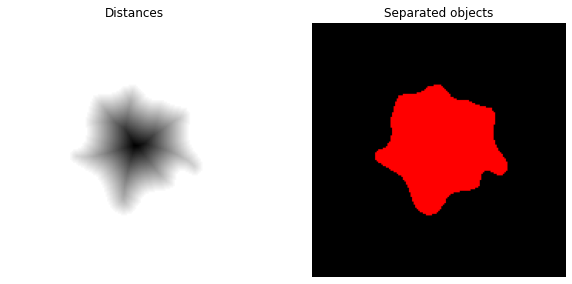

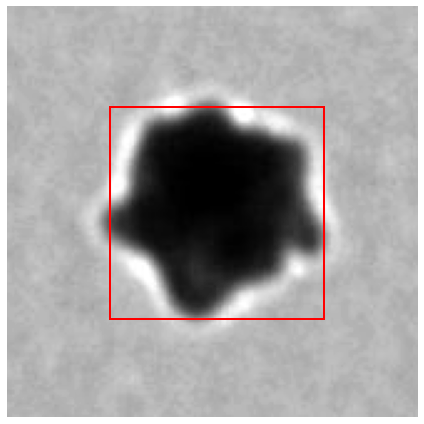

In [99]:
#second pass

im2 = utils.openFile("out/output-79.png",1.0)
im2processed = nanoSegmentation.preProcessing(im2,3,0)
imBinary2 = nanoSegmentation.thresholdOtsu(im2processed)
labels2, markers2 = nanoSegmentation.distanceBasedWatershed(imBinary2,True)
_ = boudingBox.getBoundingBox(255 - im2, labels2,250, True)

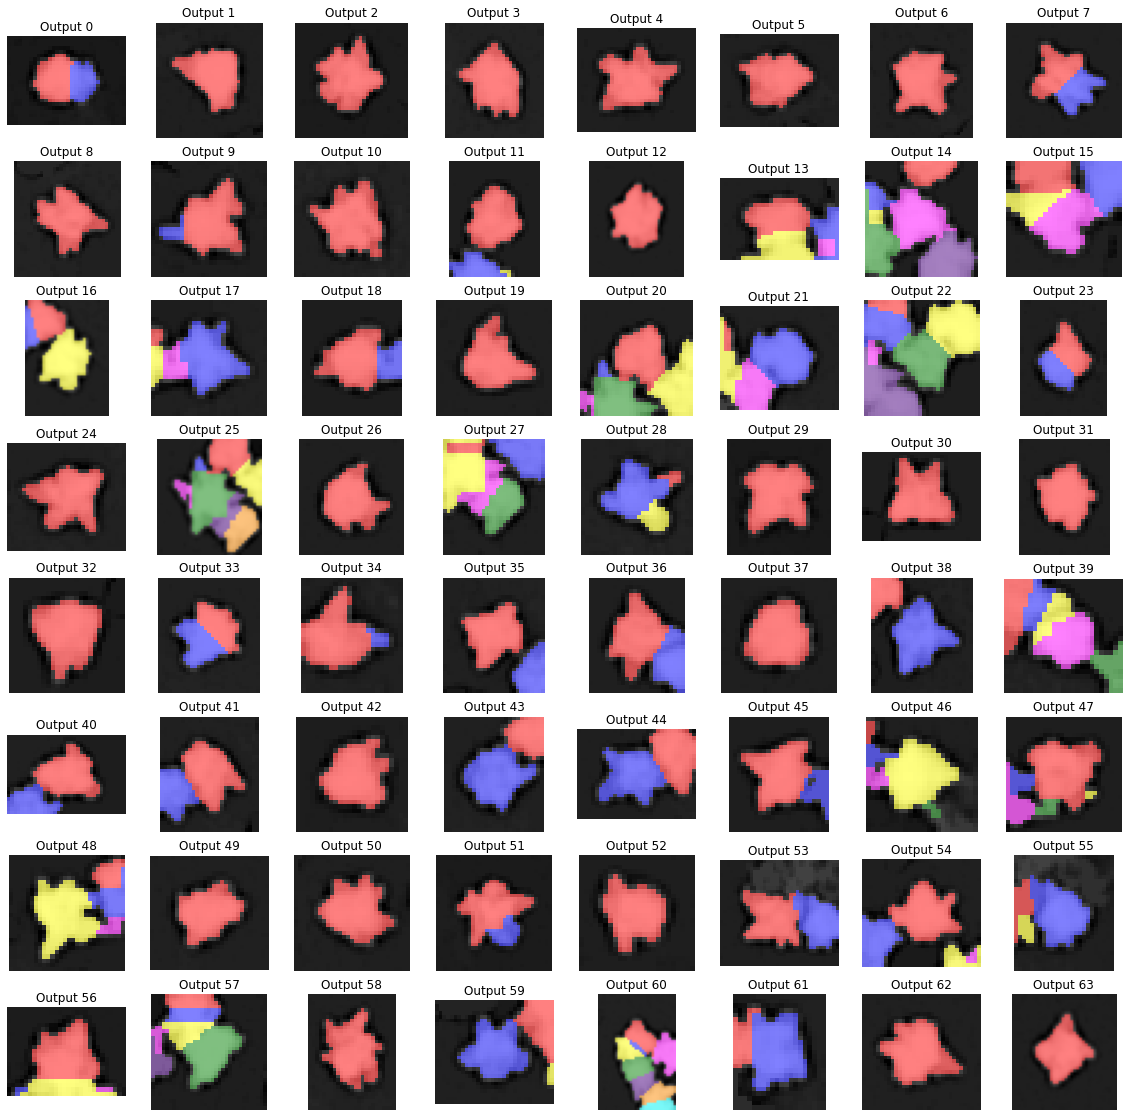

In [126]:
#second pass

fig, ax = plt.subplots(8,8,figsize=(20,20))

for i, ax in enumerate(ax.flat):
    im = utils.openFile(f"out/output-{i}.png",1.0)
    imProcessed = nanoSegmentation.preProcessing(im,7,1)
    imBinary = nanoSegmentation.thresholdOtsu(imProcessed)

    rec = sk.morphology.reconstruction(im * imBinary, im, method='dilation')

    labels, markers = nanoSegmentation.distanceBasedWatershed(nanoSegmentation.thresholdOtsu(np.int_(rec)))

    labelsColorOverlay = sk.color.label2rgb(labels)
    ax.imshow(rec, cmap="gray")
    ax.imshow(labelsColorOverlay, alpha=0.5)
    ax.set_title(f"Output {i}")
    ax.set_axis_off()

plt.show()